# **Workshop 4**

In this workshop, you'll be exploring decision trees.

# 0) Loading Data and Libraries

In [15]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets
# Remember you have to run this cell block before continuing!

## Important Note about Non-Determinism (Randomness)
Here on foward we're going to be using a lot of methods that have some randomness in their output. To address this, most sklearn libraries/functions allow you to set a `random_state` parameter, which allows the methods to have consistent output each time you run them. Make sure to set `random_state=random_seed` so we can reproduce and check your work.

In [13]:
# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

### Data

We'll be using the iris dataset as a toy example to learn decision trees.

In [14]:
# Read the iris dataset and translate to pandas dataframe
iris_sk = datasets.load_iris()
# Note that the "target" attribute is species, represented as an integer
iris_data = pd.DataFrame(data= np.c_[iris_sk['data'], iris_sk['target']],columns= iris_sk['feature_names'] + ['target'])

# 1) Training/Testing Split (Follow)

Sklearn has a neat little library for easily splitting your data into training/testing: [Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

**Use this to split your data where `test_data_fraction` is the fraction of data that will be test data**. You will have to reshape your dataframes to split them between features and your target before you put it into `train_test_split`

Make sure that in any non-deterministic process, to set the `random_state=random_seed`

In [4]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.2

In [9]:
# Goal: Split your data into features(X) and labels (Y)
# Grab all the columns except the last one
iris_features = iris_data.iloc[:,0:-1]

#Grab the last column
iris_labels = iris_data["target"]

In [10]:
# Goal: Generate the X/Y train/test datasets (4 total)
X_train, X_test, Y_train, Y_test = train_test_split(iris_features, iris_labels, test_size=test_data_fraction, random_state=random_seed)

In [11]:
print("Training Shape")
print(X_train.shape)
print(Y_train.shape)

print("Testing Shape")
print(X_test.shape)
print(Y_test.shape)

# Making sure the shapes line up:
# You should have 4 features in the X data and 1 class label in the Y
assert(X_test.shape[0]==np.ceil(test_data_fraction*iris_features.shape[0]))

Training Shape
(120, 4)
(120,)
Testing Shape
(30, 4)
(30,)


# 2) Classification with Decision Trees (Group)

Now that you know how to split your data into training and test data, you can now make a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Use sklearn to create a decision tree classifier for the iris data.

## 2.1) Gini Index

Make a decision tree classifier using the Gini Index.

As always, rember your `random_state`.

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [81]:
# Goal: create a decision tree using gini index
#gini_tree = None
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train)

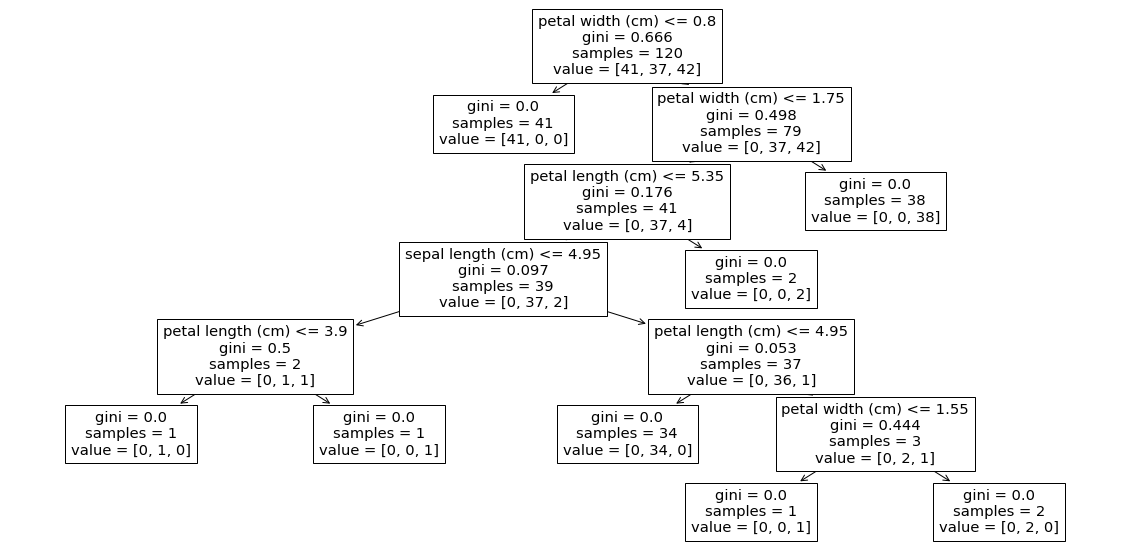

In [82]:
# We can plot the resulting tree
plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=iris_features.columns)

**Interpreting Trees**: Each node in the output tree has a few details:

1. The attribute split (and split point for continuous values). Note the right is "false" (greater than) and left is "true" (less than or equal to).
2. The GINI split value for the attribute selected.
3. The number of *training* samples in the node before it was split.
4. The number of instances of each class value in the node (this was used to calculate the GINI index).

First, let's calculate the **Training Accuracy**. Remember this is the "easy" part, since this is the data the classifier was trained on.

To do so, we need 2 library functions:
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)'s predict method
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [89]:
from sklearn.metrics import accuracy_score
# Goal: Calculate training accuracy score for the gini tree. What should it be?

y_pred = gini_tree.predict(X_test)
y_pred

array([0., 1., 2., 1., 2., 1., 2., 0., 1., 1., 0., 0., 0., 2., 0., 1., 2.,
       2., 1., 1., 1., 1., 1., 0., 0., 2., 1., 2., 2., 0.])

Now, calculate the **Test Accuracy**, using the test dataset. Do you expect this to be as good as the training accuracy?

In [90]:
# Goal: Calculate test accuracy.
accuracy_score(Y_test, y_pred)


0.9666666666666667

## 2.1) Entropy

Repeat the same procedure as 2.1, but using "entropy" instead of "gini".

In [93]:
# Goal: Create tree with entropy based splits
entropy_tree = DecisionTreeClassifier(criterion = "entropy", random_state=random_seed).fit(X=X_train, y=Y_train)

What differences do you observe between the structure of the GINI and entropy trees?

In [95]:
# Calculate the test accuracy for the entropy tree
y_pred = entropy_tree.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9333333333333333

Which type of tree would be better suited for this data?  How did you come to this determination?  

# 3) Building Trees & Interpretation (Group)

Now, we're going to shift from using the toy iris data back to our wine data.

**Your goal is to create a set of *human-interpretable* rules to tell wines apart**. 

You will:

1. Make a decision tree using the wine dataset. Make sure to take note of the accuracy of the decision tree.
2. Write down a set of notes/"flowchart" in plain language that you could give to a field tester if they wanted to classify wine.

In [30]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

wine_sk = datasets.load_wine()

# Make sure data is in the same range
wine_sk.data = MinMaxScaler().fit_transform(wine_sk.data)

# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names']+['target'])

### Building the Tree
The fraction of data that should be test data should be 20%.

As always, use `random_seed=25` for all of your code seeds to make sure your ouput is reproducable.

In [35]:
random_seed=25
np.random.seed(random_seed)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
test_data_fraction = 0.2

In [36]:
# Goal: Split the dataset into features and class labels
wine_features = wine_data.iloc[:,0:-1]

#Grab the last column
wine_labels = wine_data["target"]

In [37]:
# Goal: split the X and Y datasets into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction, random_state=random_seed)


Below, write code to train a decision tree, plot it, and calculate its accuracy.

**Note**: You should use the parameter `max_depth=2` to constrain the size and complexity of your decision tree. Remember this is a form of *pre-pruning*.

**Hint**: You may need to right-click and download the figure in order to view it. One some versions, you may 
need to shift-right-click.


Accuracy: 0.9166666666666666


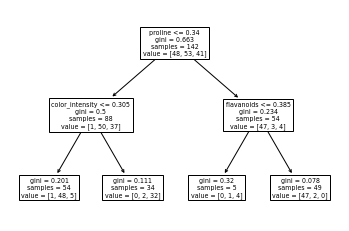

<Figure size 1440x720 with 0 Axes>

In [38]:
# Goal: Train a decision tree, plot it, and calculate its accuracy.

gini_tree = DecisionTreeClassifier(random_state=0,max_depth=2)
gini_tree.fit(X_train, Y_train)

# We can plot the resulting tree
#plt.figure(figsize=(10,5)) # create a figure size 20 and 10
# plot the tree using plot tree
_ = plot_tree(gini_tree, feature_names=wine_features.columns)
plt.figure(figsize=(20,10))

y_pred = gini_tree.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))


### Writeup

Write up your results as if you were giving them as a note sheet to a field tester who wanted to classify wine.

For example:
1. If a wine has a color_intensity above XX, it's usually a XX wine.
2. If a wine has a favanoids level below XX and a proline level above XX, it's either a XX or YY wine.

**Put writeup here** 
if a color_intensity less than 0.305 its is either wine 01, or 00, but the sample rate suggests its a higher probability of vbing a wine 01 category.
if a wine has a flavanoids level below 0.385 and a profile above 0.34, its either wine 0, or wine 2.

# 4) Pruning

## 4.1 More Pre-Pruning (Follow)
Now, let's take a closer and more critical look at the above decision tree from the wine dataset.

In our prior model, we set the `max_depth=2`. Play around with different values for `max_depth`. How does the training/test accuracy change? What is the maximum depth of the tree (e.g. no pre-pruning)? For each depth, do you think that the model is general enough, or do you think that it could possibly be overfitting? If so, what splits/leaves do you think could be overfitting? If not, why? **Discuss and explain your reasoning here.**

**Capture your discussion below**



### Min Impurity Decrease

Read the documentation for [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and take note of the various params that can be used for pre-pruning. We will go in detail on `min_impurity_decrease` together.

Accuracy with Impurity Decrease 0.05
Train Accuracy: 0.9225352112676056
Test Accuracy: 0.9166666666666666


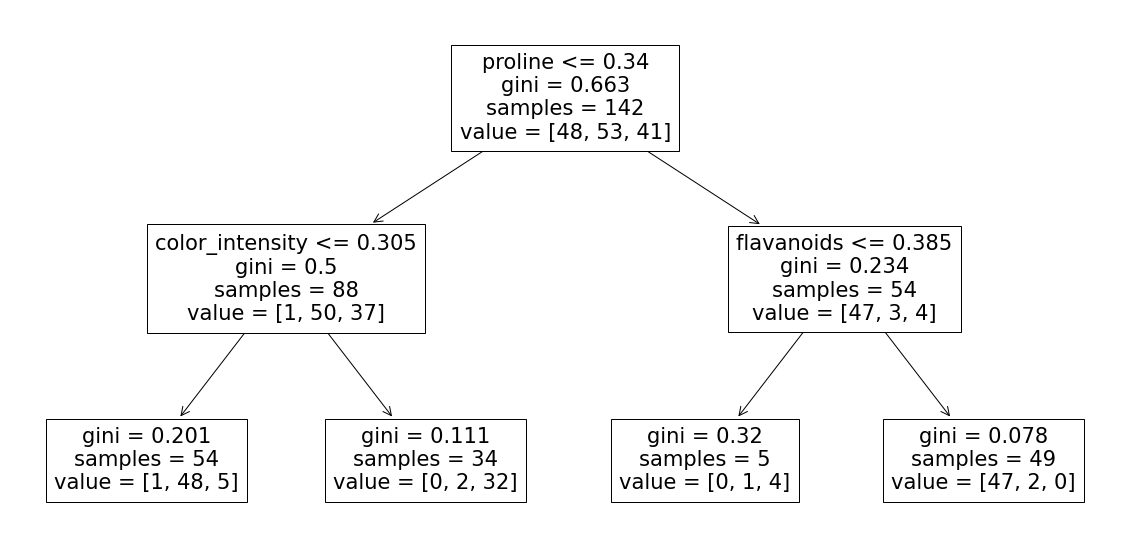

In [39]:
impurity_decrease = 0.05
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, min_impurity_decrease=impurity_decrease).fit(X=X_train, y=Y_train)
plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=wine_features.columns)
print(f"Accuracy with Impurity Decrease {impurity_decrease}")
print(f'Train Accuracy: {accuracy_score(Y_train, gini_tree.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(Y_test, gini_tree.predict(X_test))}')

Accuracy with Impurity Decrease 0.1
Train Accuracy: 0.8943661971830986
Test Accuracy: 0.8611111111111112


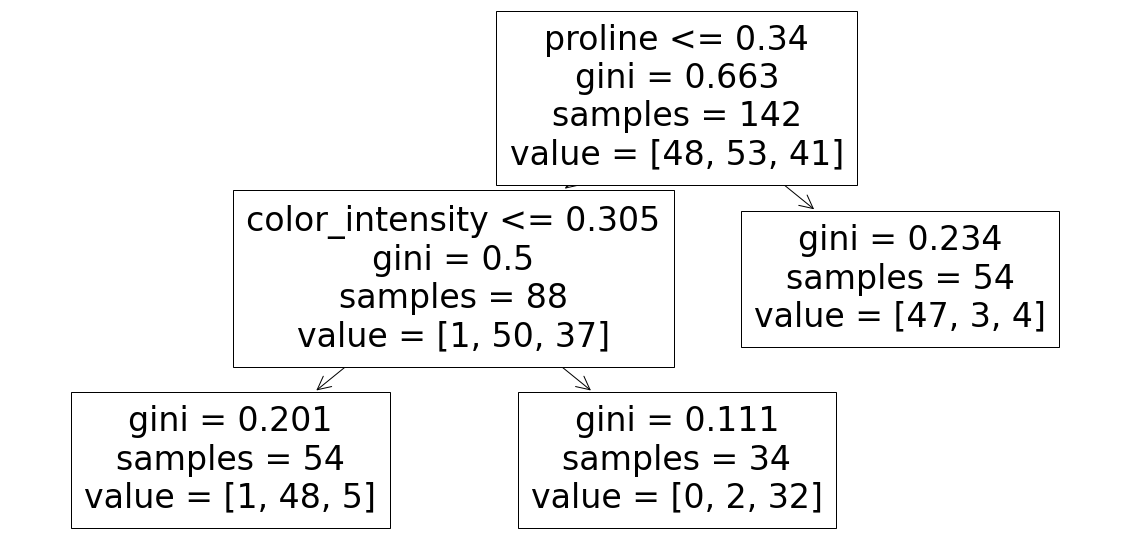

In [40]:
# However, if you go too far you end up decrease both the training and test accuracy
impurity_decrease = 0.1
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, min_impurity_decrease=impurity_decrease).fit(X=X_train, y=Y_train)
plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=wine_features.columns)
print(f"Accuracy with Impurity Decrease {impurity_decrease}")
print(f'Train Accuracy: {accuracy_score(Y_train, gini_tree.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(Y_test, gini_tree.predict(X_test))}')

There are other methods for pre-pruning, but we won't explore them today.
Read the documentation for [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and take note of the various params that can be used for pre-pruning. These are

* `max_depth` (already covered)
* `min_samples_split`
* `min_samples_leaf`
* `max_features`
* `max_leaf_nodes`
* `min_impurity_decrease` (already covered)

## 4.2 Post Pruning [Cost Complexity Pruning] (Follow)

Sklearn implements a more advanced form of post-pruning that we haven't covered in class called [cost complexity pruning (CCP)](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). The idea is essentially a more complex/robust form of what we've talked about - seeing if estimated error improves after pruning certain nodes after the tree is built. The amount of the tree pruned is controlled by the paramater `ccp_alpha`. 

Try some different values of `ccp_alpha` in the range (0,0.3) to see their effect on the accuracy.

Accuracy with ccp_alpha=0.1
Train Accuracy: 0.8943661971830986
Test Accuracy: 0.8611111111111112


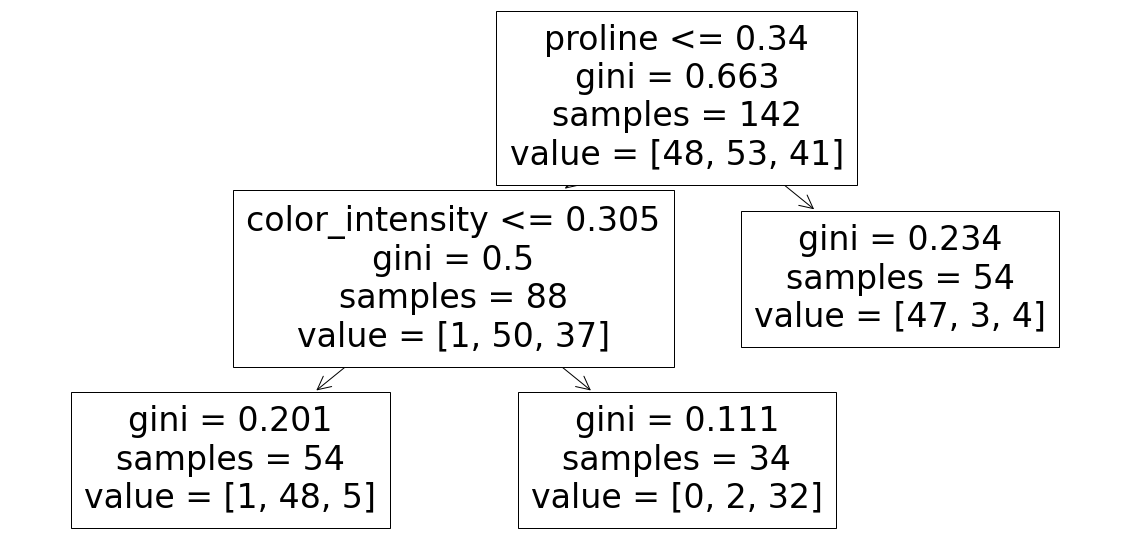

In [41]:
ccp_alpha = 0.1

# Goal: Train a deicsion tree with gini index with the specified ccp_alpha
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=ccp_alpha).fit(X=X_train, y=Y_train)
train_acc_value = accuracy_score(Y_train, gini_tree.predict(X_train))
test_acc_value = accuracy_score(Y_test, gini_tree.predict(X_test))

print(f"Accuracy with ccp_alpha={ccp_alpha}")
print(f'Train Accuracy: {accuracy_score(Y_train, gini_tree.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(Y_test, gini_tree.predict(X_test))}')

plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=wine_features.columns)

## 4.3 Finding the Best Alpha (Group)

Of course, manually trying different alphas and seeing if the accuracy increases is highly inefficent. We can write code to automate this: trying different values of the `ccp_alpha` paramater, and seeing what gives us the best result.

**Write a function that will iteratively built decision trees different values of alpha, and report back both the training and testing accuracy for each alpha value.** You'll then plot these values and determine which alpha leads to the best performing decision tree.

This process of iterating over paramaters to find the best one is called *hyperparmeter tuning*, which we will cover in later lectures.

In [55]:
def get_accuracy_list(minimum,maximum,step):
    """
    Input: 
        minimum: the lowest possible value for alpha
        maximum: the highest possible value for alpha
        step: the step size/how much we increment alpha each try
        
    Output: 
        alpha_values: a list containing all of the alpha values tried
        train_accuracy: a list containing the training accuracy for a model trained with each alpha in alpha_values
        train_accuracy: a list containing testing accuracy for a model trained with each alpha in alpha_values
    
    
    Assume the model is trained using the gini index.
    """
    
    # np.arange generates a list that starts at minimum, ends at maximum, and increments by step
    alpha_values = np.arange(minimum,maximum,step)
    
    #two lists to hold our accuracy
    train_acc = []
    test_acc = []
    for av in alpha_values:
        #print(av)
        gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=av).fit(X=X_train, y=Y_train)
        train_acc.append(accuracy_score(Y_train, gini_tree.predict(X_train)))
        test_acc.append(accuracy_score(Y_test, gini_tree.predict(X_test)))
    
    return alpha_values, train_acc, test_acc

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07


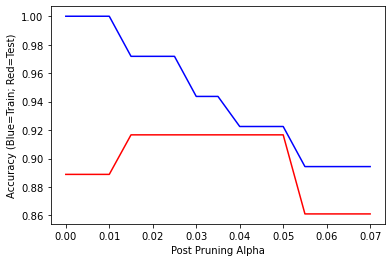

In [59]:
# Get our accuracy
alpha_values, train_acc, test_acc = get_accuracy_list(0,0.07,0.005)

# Plot our results
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=0.55).fit(X=X_train, y=Y_train)

plt.plot(alpha_values, train_acc, color='blue')
plt.plot(alpha_values, test_acc, color='red')
plt.xlabel("Post Pruning Alpha")
_ = plt.ylabel("Accuracy (Blue=Train; Red=Test)")

1. How does training accuracy change as the alpha value changes? Why?  yes...as you start the data is over fitted for the results to be useful.  as the data is trained and increments increase, the accuracy improves for both test and training data (which is what we want).  the best results are between alpha variables .04- .5.
2. How does the testing accuracy change as the alpha value chanegs? Why?  
3. Knowing this, what value would you choose for alpha for the final model? Why? Plot the final decision tree with your alpha selection.  .45, or .05.

**Discuss here**

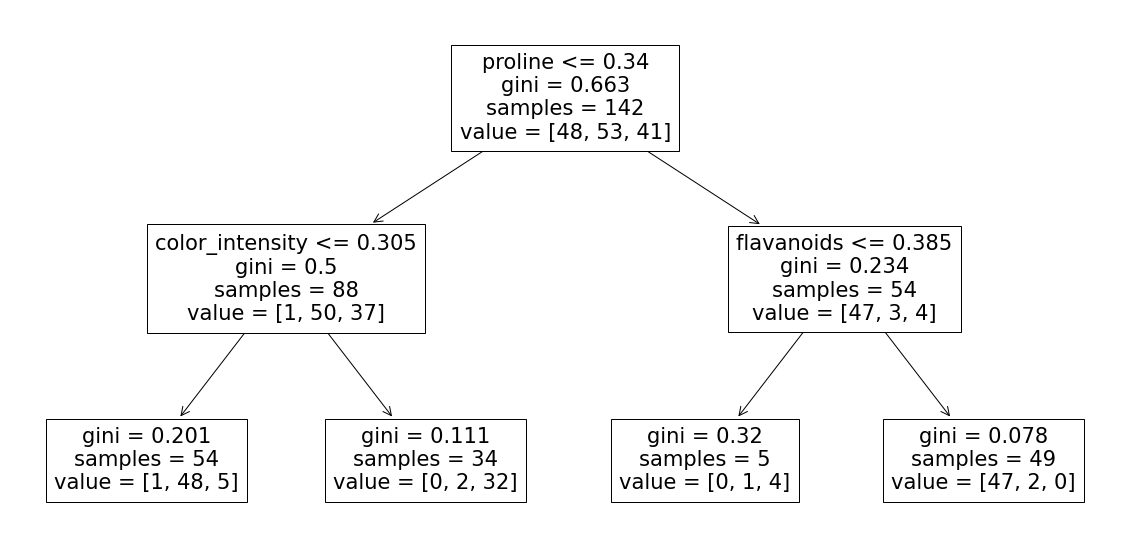

In [62]:
# Plot your tree here with the best alpha value
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=0.05).fit(X=X_train, y=Y_train)

plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=wine_features.columns)

# awesome!!